In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Training & Testing Accuracy

In [27]:
cnn2D_train = pd.read_csv('plotting_data/cnn2D_model2020_12_10_01_training_history.csv', header=None, names=['loss', 'accuracy'])
cnn2D_test = pd.read_csv('plotting_data/cnn2D_model2020_12_10_01_testing_history.csv', header=None, names=['loss', 'accuracy'])
cnn2D_test_acr = cnn2D_test['accuracy'].values[0]

res2D_train = pd.read_csv('plotting_data/res2D_12_15_1_training_history.csv', header=None, names=['train_loss', 'train_accuracy', 'AUC', 'val_loss', 'val_accr', 'val_AUC'])
res2D_test_acr = res2D_train['val_accr'][9]

id3 = pd.read_csv('plotting_data/iD3_1_training_history.csv', header=None, names=['train_loss', 'train_accuracy', 'AUC', 'val_loss', 'val_accr', 'val_AUC'])
id3_test_acr = id3['val_accr'][9]

cnn3D_train = pd.read_csv('plotting_data/cnn3D_model2020_12_10_14_training_history.csv', header=None, names=['loss', 'accuracy'])
cnn3D_test = pd.read_csv('plotting_data/cnn3D_model2020_12_10_14_testing_history.csv', header=None, names=['loss', 'accuracy'])
cnn3D_test_acr = cnn3D_test['accuracy'].values[0]

res3D_train = pd.read_csv('plotting_data/res3D_model_training_history.csv', header=None, names=['loss', 'accuracy'])
res3D_test = pd.read_csv('plotting_data/res3D_model_testing_history.csv', header=None, names=['loss', 'accuracy'])
res3D_test_acr = res3D_test['accuracy'].values[0]

mc2_train = pd.read_csv('plotting_data/mc2_model2020_12_11_05_training_history.csv', header=None, names=['loss', 'accuracy'])
mc2_test = pd.read_csv('plotting_data/mc2_model2020_12_11_05_testing_history.csv', header=None, names=['loss', 'accuracy'])
mc2_test_acr = mc2_test['accuracy'].values[0]


mobileNet_train = pd.read_csv('plotting_data/mobilenet_model2020_12_14_3.csv', header=None, names=['train_loss', 'train_accuracy', 'train_auc','val_loss', 'val_accuracy', 'val_auc'])
mobileNet_test_acr = mobileNet_train['val_accuracy'][9]


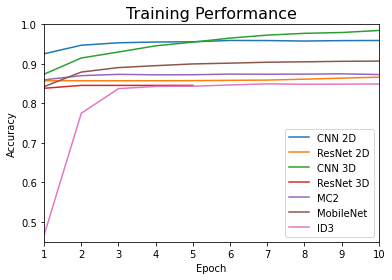

In [28]:
plt.xlim(0,9)
plt.xticks(ticks=np.arange(0,10), labels=np.arange(1,11))
plt.ylim(0.45,1)

plt.plot(cnn2D_train['accuracy'], label='CNN 2D')
plt.plot(res2D_train['train_accuracy'], label='ResNet 2D')

plt.plot(cnn3D_train['accuracy'], label='CNN 3D')
plt.plot(res3D_train['accuracy'], label='ResNet 3D')

plt.plot(mc2_train['accuracy'], label='MC2')
plt.plot(mobileNet_train['train_accuracy'], label = 'MobileNet')

plt.plot(id3['train_accuracy'], label='I3D')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Performance', fontsize=16)
plt.legend(loc='best')
plt.show()

In [29]:
# Test accr
print('moblN:',mobileNet_test_acr)
print('cnn2d:', cnn2D_test_acr)
print('id3:  ',id3_test_acr)
print('cnn3d:',cnn3D_test_acr)
print('res2d:',res2D_test_acr)
print('mc2:  ',mc2_test_acr)
print('res3d:',res3D_test_acr)

moblN: 0.9152
cnn2d: 0.8844082951545715
id3:   0.8547534942626953
cnn3d: 0.8538037538528442
res2d: 0.8494821190834045
mc2:   0.8491730690002441
res3d: 0.8434967994689941


# ROC AUC

These are suspect; use printed training values (from model.fit) instead of these contradicting logs that I wrote.

In [13]:
cnn2D = pd.read_csv('plotting_data/cnn2D_model2020_12_11_16_roc_data.csv', header=None, names=['False Pos', 'True Pos', 'Threshold'])
cnn2D_auc = np.load('plotting_data/cnn2D_model2020_12_11_16_auc.npy')
#res2D = pd.read_csv('plotting_data/res2D_model2020_12_10_12_roc_data.csv', header=None, names=['False Pos', 'True Pos', 'Threshold'])
#res2D_auc = np.load('plotting_data/res2D_model2020_12_10_12_auc.npy')

#cnn3D = pd.read_csv('plotting_data/cnn3D_model2020_12_10_13_roc_data.csv', header=None, names=['False Pos', 'True Pos', 'Threshold'])
#cnn3D_auc = np.load('plotting_data/cnn3D_model2020_12_10_13_auc.npy')
#res3D = pd.read_csv('plotting_data/res3D_model2020_12_10_13_roc_data.csv', header=None, names=['False Pos', 'True Pos', 'Threshold'])
#res3D_auc = np.load('plotting_data/res3D_model2020_12_10_13_auc.npy')

#mc2 = pd.read_csv('plotting_data/mc2_model2020_12_11_05_roc_data.csv', header=None, names=['False Pos', 'True Pos', 'Threshold'])
#mc2_auc = np.load('plotting_data/mc2_model2020_12_11_05_auc.npy')

mobilenet = pd.read_csv('plotting_data/mobilenet_test_roc_data.csv', header=None, names=['False Pos', 'True Pos', 'Threshold'])
mobilenet_auc = np.load('plotting_data/mobilenet_test_auc.npy') # this is suspect; model output gave AUC = 0.8

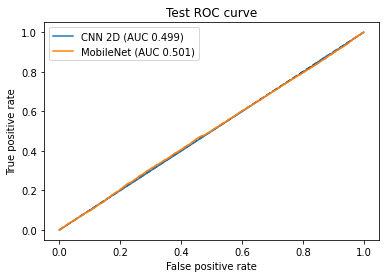

In [14]:
plt.plot([0, 1], [0, 1], 'k--')

plt.plot(cnn2D['False Pos'], cnn2D['True Pos'], label='CNN 2D (AUC {:.3f})'.format(cnn2D_auc))
#plt.plot(res2D['False Pos'], res2D['True Pos'], label='ResNet 2D (AUC {:.3f})'.format(res2D_auc))

#plt.plot(cnn3D['False Pos'], cnn3D['True Pos'], label='CNN 3D (AUC {:.3f})'.format(cnn3D_auc))
#plt.plot(res3D['False Pos'], res3D['True Pos'], label='ResNet 3D (AUC {:.3f})'.format(res3D_auc))

#plt.plot(mc2['False Pos'], mc2['True Pos'], label='MC2 (AUC {:.3f})'.format(mc2_auc))

plt.plot(mobilenet['False Pos'], mobilenet['True Pos'], label='MobileNet (AUC {:.3f})'.format(mobilenet_auc))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Test ROC curve')
plt.legend(loc='best')
plt.show()

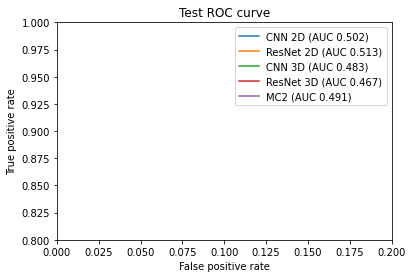

In [68]:
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')

plt.plot(cnn2D['False Pos'], cnn2D['True Pos'], label='CNN 2D (AUC {:.3f})'.format(cnn2D_auc))
plt.plot(res2D['False Pos'], res2D['True Pos'], label='ResNet 2D (AUC {:.3f})'.format(res2D_auc))

plt.plot(cnn3D['False Pos'], cnn3D['True Pos'], label='CNN 3D (AUC {:.3f})'.format(cnn3D_auc))
plt.plot(res3D['False Pos'], res3D['True Pos'], label='ResNet 3D (AUC {:.3f})'.format(res3D_auc))

plt.plot(mc2['False Pos'], mc2['True Pos'], label='MC2 (AUC {:.3f})'.format(mc2_auc))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Test ROC curve')
plt.legend(loc='best')
plt.show()